# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [18]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#lat_range = (-5, 5)
#lng_range = (-5, 5)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
#cities = cities[0:1]
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)



        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as err:
        print(f"City not found. Skipping... {str(err)}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | meulaboh
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | lasa
Processing Record 6 of Set 1 | goderich
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | kamenka
Processing Record 9 of Set 1 | leningradskiy
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | ouadda
Processing Record 12 of Set 1 | praya
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | la palma del condado
Processing Record 16 of Set 1 | pevek
Processing Record 17 of Set 1 | kerouane
Processing Record 18 of Set 1 | oranjemund
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | namatanai
Processing Record 21 of Set 1 | madimba
Processing Record 22 of Set 1 | hilo
Processing Record 23 of Set 1 | kon

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,21.77,92,6,1.79,ZA,1675622693
1,meulaboh,4.1363,96.1285,23.34,89,100,1.79,ID,1675622693
2,iqaluit,63.7506,-68.5145,-29.06,68,100,9.26,CA,1675622451
3,busselton,-33.6500,115.3333,18.99,83,30,6.28,AU,1675622693
4,lasa,46.6166,10.7002,2.49,93,78,2.71,IT,1675622694


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,21.77,92,6,1.79,ZA,1675622693
1,meulaboh,4.1363,96.1285,23.34,89,100,1.79,ID,1675622693
2,iqaluit,63.7506,-68.5145,-29.06,68,100,9.26,CA,1675622451
3,busselton,-33.6500,115.3333,18.99,83,30,6.28,AU,1675622693
4,lasa,46.6166,10.7002,2.49,93,78,2.71,IT,1675622694


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

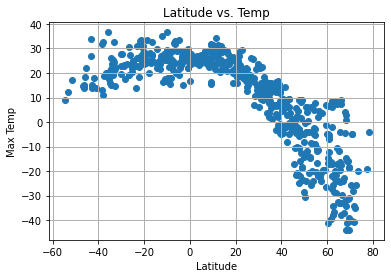

In [24]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",label="Cities")
plt.grid(linestyle='-', linewidth=1, alpha = 1)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temp")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

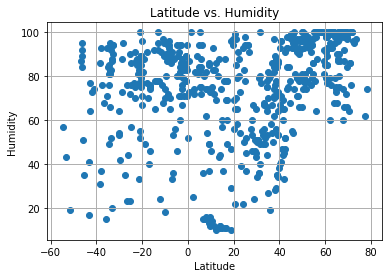

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",label="Cities")
plt.grid(linestyle='-', linewidth=1, alpha = 1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

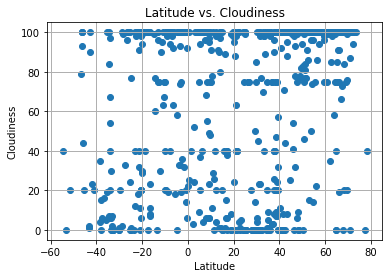

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",label="Cities")
plt.grid(linestyle='-', linewidth=1, alpha = 1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

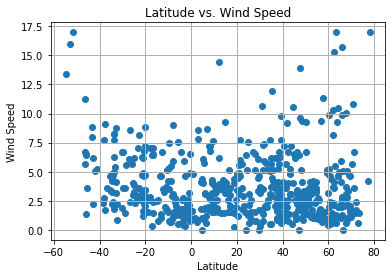

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",label="Cities")
plt.grid(linestyle='-', linewidth=1, alpha = 1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots


In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,meulaboh,4.1363,96.1285,23.34,89,100,1.79,ID,1675622693
2,iqaluit,63.7506,-68.5145,-29.06,68,100,9.26,CA,1675622451
4,lasa,46.6166,10.7002,2.49,93,78,2.71,IT,1675622694
5,goderich,43.7501,-81.7165,3.84,75,100,7.20,CA,1675622680
6,jamestown,42.0970,-79.2353,7.77,33,100,6.69,US,1675622684


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,21.77,92,6,1.79,ZA,1675622693
3,busselton,-33.6500,115.3333,18.99,83,30,6.28,AU,1675622693
12,east london,-33.0153,27.9116,24.52,88,0,4.12,ZA,1675622695
13,ushuaia,-54.8000,-68.3000,8.81,57,40,13.38,AR,1675622696
17,oranjemund,-28.5500,16.4333,17.41,95,99,5.59,NaN,1675622697


###  Temperature vs. Latitude Linear Regression Plot

-0.8681659870036006


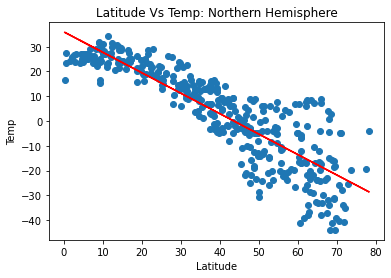

In [39]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.title("Latitude Vs Temp: Northern Hemisphere")
print(r_value)


0.4275264456399407


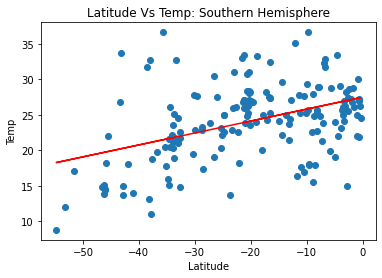

In [40]:
# Linear regression on Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.title("Latitude Vs Temp: Southern Hemisphere")
print(r_value)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

0.48234565229445336


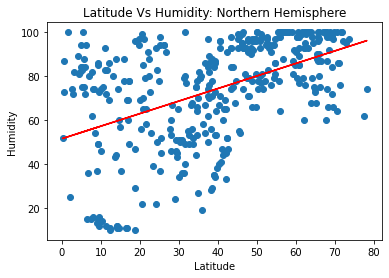

In [49]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude Vs Humidity: Northern Hemisphere")
print(r_value)


0.25067973014500683


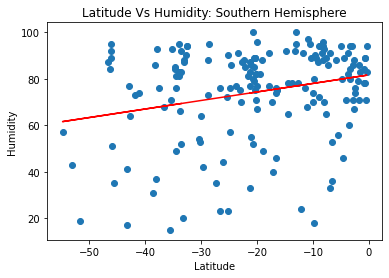

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude Vs Humidity: Southern Hemisphere")
print(r_value)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

0.303112085401956


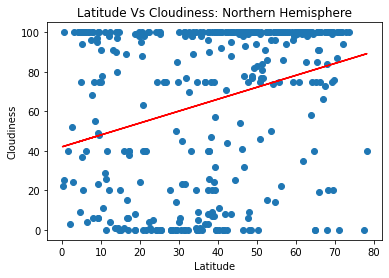

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude Vs Cloudiness: Northern Hemisphere")
print(r_value)

0.35198884185086293


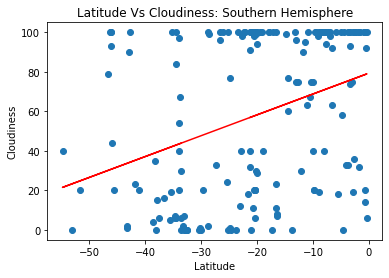

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude Vs Cloudiness: Southern Hemisphere")
print(r_value)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

0.03671083066854254


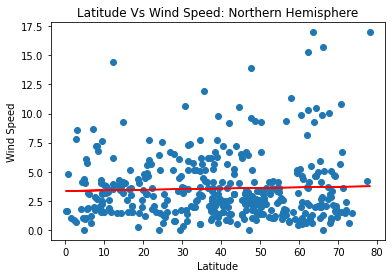

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude Vs Wind Speed: Northern Hemisphere")
print(r_value)

-0.49665888058525137


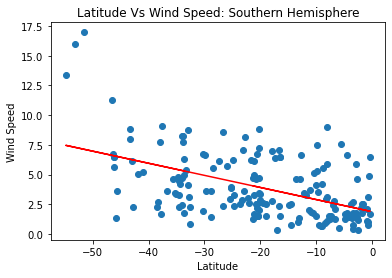

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude Vs Wind Speed: Southern Hemisphere")
print(r_value)

**Discussion about the linear relationship:** YOUR RESPONSE HERE